In [1]:
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("NonHermitianQW"))))


In [2]:
from operators import op
from oneDimQW import *
from twoDimQW import *
import numpy as np
from matplotlib import pyplot as plt
from numpy import pi
from numpy.linalg import eig
from scipy.linalg import expm
from berry import BerryPhase

In [3]:
import ipywidgets as widgets
from ipywidgets import interact

<h1>Simple Quantum Walk</h1>

<h3>Defining parameters</h3>

In [4]:
dim = 50
coin_dict = {"th" : pi/4 , "n" : [0,1,0]}
init_state_dict = {"x0" : dim//2, "a" : 1, "b" : 1j}
steps = 100

model = one_dim_QW(dim,coin_dict,**init_state_dict)
data = model.evolve(steps)

In [5]:
def show_evolution(data):
    _,n = data.shape
    x = np.arange(0,n)
    def inner(t):
        fig, axs = plt.subplots(1,2,figsize = (10,5))
        
        cax = axs[0].imshow(data,cmap = "viridis")
        fig.colorbar(cax)
        axs[0].set_ylabel("t")
        axs[0].set_xlabel("x")
        axs[0].set_title("Probability map")

        x = np.arange(0,n)
        axs[1].plot(x,data[int(t),:],color = "blue")
        axs[1].set_xlabel("x")
        axs[1].set_ylabel("P")
        axs[1].set_title("Probability distribution")
        axs[1].fill_between(x,data[int(t),:],color="blue",alpha = 0.4)
    return inner

In [6]:

steps_slider = widgets.FloatSlider(value=0, min=0, max=steps-1, step=1, description='steps')
interact(show_evolution(data), t = steps_slider)
plt.show()


interactive(children=(FloatSlider(value=0.0, description='steps', max=99.0, step=1.0), Output()), _dom_classes…

<h3>Eigenspectrum</h3>

In [7]:
U_k = model.momentum_U()
En = - np.angle(eig(U_k)[0])

Ep, Em = En[En > 0], En[En < 0]
k = (np.arange(0,dim)-dim//2)*(2*pi/dim)

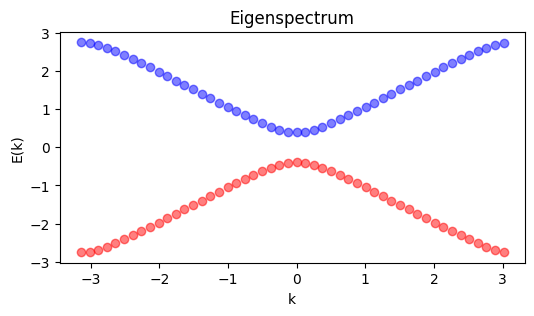

In [8]:
fig, ax = plt.subplots(figsize = (6,3))

ax.scatter(k,Ep,color="blue",alpha=0.5)
ax.scatter(k,Em,color="red",alpha=0.5)
ax.set_xlabel("k")
ax.set_ylabel(r"E(k)")
ax.set_title("Eigenspectrum")

plt.show()

<h1>Single step quantum walk</h1>

<h2>Berry phase for s-s quantum walk</h2>

In [15]:
bp = BerryPhase(dim)

def berry_phase(th1,th2):
    coin_dict = {
        "th1" : th1,
        "th2" : th2,
        "n" : [0,1,0]
    }
    model = ss_one_dim_QW(dim,coin_dict)
    return bp.Calculate(model)

th_1 = np.arange(-2*np.pi,2*np.pi,0.1)
th_2 = np.arange(-2*np.pi,2*np.pi,0.1)
th_1, th_2 = np.meshgrid(th_1,th_2)

data_ans = np.vectorize(berry_phase)(th_1,th_2)

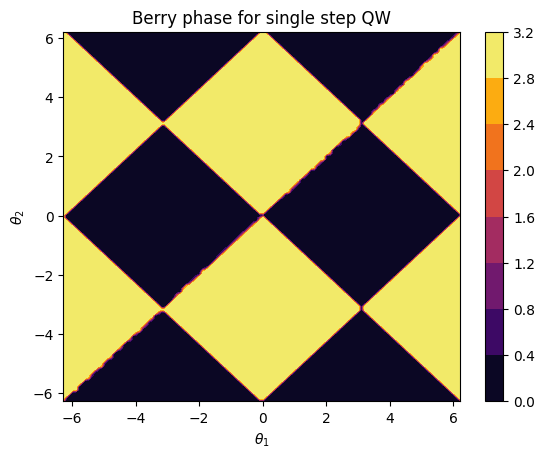

In [19]:
fig,ax = plt.subplots()

cax = ax.contourf(th_1,th_2,data_ans[0],cmap = "inferno")
fig.colorbar(cax)
ax.set_xlabel(r"$\theta_{1}$")
ax.set_ylabel(r"$\theta_{2}$")
ax.set_title("Berry phase for single step QW")

plt.show()
